Batch Normalization (BN):

Batch normalization is a technique used to normalize the inputs to each layer of a neural network by scaling and shifting them. It helps speed up training and makes the network more stable by reducing internal covariate shifts.

In the code, BatchNormalization() layers are conditionally added after the Dense layers. If batch_norm=True, batch normalization is applied to normalize the activations, which helps the model converge faster.


Dropout:

Dropout is a regularization technique that randomly sets a fraction of the neurons in the layer to zero during training. This prevents the model from becoming too dependent on specific neurons and helps prevent overfitting.

In the code, Dropout() layers are conditionally added after the Dense layers. If dropout_rate > 0, dropout is applied to randomly "drop out" neurons, forcing the network to generalize better.

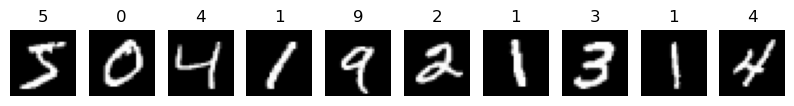

Epoch 1/10
938/938 - 3s - loss: 0.2278 - accuracy: 0.9336 - val_loss: 0.1096 - val_accuracy: 0.9684 - 3s/epoch - 3ms/step
Epoch 2/10
938/938 - 2s - loss: 0.0897 - accuracy: 0.9728 - val_loss: 0.0957 - val_accuracy: 0.9710 - 2s/epoch - 2ms/step
Epoch 3/10
938/938 - 2s - loss: 0.0595 - accuracy: 0.9816 - val_loss: 0.0794 - val_accuracy: 0.9764 - 2s/epoch - 2ms/step
Epoch 4/10
938/938 - 2s - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0650 - val_accuracy: 0.9801 - 2s/epoch - 2ms/step
Epoch 5/10
938/938 - 2s - loss: 0.0332 - accuracy: 0.9894 - val_loss: 0.0775 - val_accuracy: 0.9794 - 2s/epoch - 2ms/step
Epoch 6/10
938/938 - 2s - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.0844 - val_accuracy: 0.9763 - 2s/epoch - 2ms/step
Epoch 7/10
938/938 - 2s - loss: 0.0219 - accuracy: 0.9927 - val_loss: 0.0806 - val_accuracy: 0.9793 - 2s/epoch - 2ms/step
Epoch 8/10
938/938 - 2s - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0820 - val_accuracy: 0.9783 - 2s/epoch - 2ms/step
Epoch 9/10
938/938 - 2s 

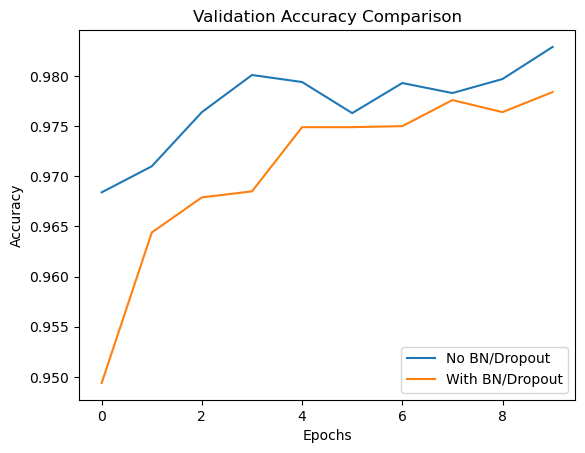

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Display sample images
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"{y_train[i]}")
    plt.axis('off')
plt.show()

# Function to create and compile a model
def create_model(batch_norm=False, dropout_rate=0.0):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(256, activation='relu'))
    if batch_norm:
        model.add(BatchNormalization())
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation='relu'))
    if batch_norm:
        model.add(BatchNormalization())
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train a model
def train_and_evaluate(batch_norm=False, dropout_rate=0.0):
    model = create_model(batch_norm, dropout_rate)
    return model.fit(x_train, y_train_cat, epochs=10, batch_size=64, 
                     validation_data=(x_test, y_test_cat), verbose=2)

# Train and compare models
history_no_bn_dropout = train_and_evaluate(batch_norm=False, dropout_rate=0.0)
history_bn_dropout = train_and_evaluate(batch_norm=True, dropout_rate=0.5)

# Plotting validation accuracy comparison
plt.plot(history_no_bn_dropout.history['val_accuracy'], label='No BN/Dropout')
plt.plot(history_bn_dropout.history['val_accuracy'], label='With BN/Dropout')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
